In [3513]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('/Users/panoskolyvakis/PythonForData/HousePrice/train.csv')
test_set = pd.read_csv('/Users/panoskolyvakis/PythonForData/HousePrice/test.csv')
pd.set_option('display.max_rows' , 200)
pd.set_option('display.max_columns' , 200)


In [3514]:
test_set.shape , train_set.shape

((1459, 80), (1460, 81))

In [3515]:
train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3516]:
y = train_set['SalePrice']
train_set.drop('SalePrice', axis =1 , inplace=True)
# save test ID for submission logs later and drop from original set
test_ID = test_set['Id']
train_set.drop('Id', axis =1 , inplace=True)
test_set.drop('Id', axis =1 , inplace=True)

In [3517]:
train_set.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [3518]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3519]:
test_set.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [3520]:
cols_with_na_train = [x for x in train_set.columns if train_set[x].isnull().sum() != 0]

train_set[cols_with_na_train].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

These contain way to many missing vals so they will be dropped.
PoolQC
MiscFeature
Alley
Fence
FireplaceQu

In [3521]:
columns_to_drop = ['PoolQC' , 'MiscFeature' , 'Alley' , 'Fence' , 'FireplaceQu']
for col in columns_to_drop:
    test_set.drop(col , inplace = True,axis=1)
    train_set.drop(col ,inplace = True, axis=1)
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [3522]:
cols_with_na_test = [x for x in test_set.columns if test_set[x].isnull().sum() != 0]

test_set[cols_with_na_test].isnull().sum()


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [3523]:
def impute_missing_values(df):
    # Get column names with missing values
    cols_missing_values = df.columns[df.isnull().any()]
    
    for col in cols_missing_values:
        if df[col].dtype in ['float64' , 'int64']:
            # Replace missing values with mean for numeric columns
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # Replace missing values with mode for categorical columns
            df[col].fillna(df[col].mode()[0], inplace=True)
impute_missing_values(test_set)
impute_missing_values(train_set)

In [3524]:
cols_with_na_test = [x for x in test_set.columns if test_set[x].isnull().sum() != 0]

test_set[cols_with_na_test].isnull().sum()

Series([], dtype: float64)

the train and test set contain missing values in the same cols (print(cols_with_na == cols_with_na_test) evaluates to True)
we therefore need to cho

In [3525]:
def encode_column(df, column_name, mapping):
    """
    Encodes the given column in the given DataFrame using label encoding.
    The encoding is performed based on the provided mapping dictionary.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be encoded.
    column_name (str): The name of the column to be encoded.
    mapping (dict): A dictionary that maps the original values to their encoded values.
    
    Returns:
    pandas.DataFrame: The DataFrame with the encoded column.
    """
    new_col_name = f'{column_name}_encoded'
    df[new_col_name] = df[column_name].map(mapping).fillna(-1)
    return df


In [3526]:
import pandas as pd
import datetime


def convert_to_unix_timestamp(df, yr_col, mo_col):
    # Create datetime object
    df['timestamp'] = pd.to_datetime(df[yr_col].astype(str) + '-' + df[mo_col].astype(str), format='%Y-%m')

    # Convert to Unix timestamp
    df['unix_timestamp'] = df['timestamp'].apply(lambda x: int(x.timestamp()))

    # Drop intermediate column
    df = df.drop(columns=['timestamp'])

    return df

# Assuming your DataFrame is called `df`
convert_to_unix_timestamp(test_set ,'YrSold', 'MoSold' )
convert_to_unix_timestamp(train_set ,'YrSold', 'MoSold' )
test_set.drop(['MoSold' ], axis = 1, inplace = True)
train_set.drop(['MoSold' ], axis = 1, inplace = True)

for df in [test_set , train_set]:
    # sum the floor area
    df['TotalFlrArea'] = df['1stFlrSF'] + df['2ndFlrSF']
    df.drop(['1stFlrSF' ,'2ndFlrSF'] , axis = 1, inplace = True)

    # sum the bathrooms
    df['TotalBaths'] = df['BsmtFullBath'] + 0.5* df['BsmtHalfBath'] + df['FullBath'] + 0.5 * df['HalfBath']
    df["houseAge"] = df['YrSold'] - df['YearBuilt']
test_set.drop(['BsmtFullBath' ,'BsmtHalfBath' , 'FullBath' ,'HalfBath'], axis = 1 , inplace= True)
train_set.drop(['BsmtFullBath' ,'BsmtHalfBath' , 'FullBath' ,'HalfBath'] , axis = 1 ,inplace = True)


# LotShape Label encoding 

test_set = encode_column(df = test_set, column_name='LotShape', mapping= {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
train_set = encode_column(df = train_set, column_name='LotShape', mapping=  {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
test_set.drop('LotShape' , axis = 1 ,inplace = True)
train_set.drop('LotShape' , axis = 1 ,inplace = True)
# LandContor
test_set = encode_column(df = test_set, column_name='LandContour', mapping= {'Lv1' : 3 , 'Bnk' : 2 , 'HLS' : 1 , 'Low' :0})
train_set = encode_column(df = train_set, column_name='LandContour', mapping=  {'Lv1' : 3 , 'Bnk' : 2 , 'HLS' : 1 , 'Low' :0})
test_set.drop('LandContour' , axis = 1, inplace = True)
train_set.drop('LandContour' , axis = 1, inplace = True)
# BstmQual 
test_set = encode_column(df = test_set, column_name='BsmtQual', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='BsmtQual', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('BsmtQual' , axis = 1 , inplace = True)
train_set.drop('BsmtQual' , axis = 1, inplace = True)
#BSmt cond
test_set = encode_column(df = test_set, column_name='BsmtCond', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='BsmtCond', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('BsmtCond' , axis = 1 ,inplace = True)
train_set.drop('BsmtCond' , axis = 1, inplace = True)
# KitchenQual 
test_set = encode_column(df = test_set, column_name='KitchenQual', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='KitchenQual', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('KitchenQual' , axis = 1 ,inplace = True)
train_set.drop('KitchenQual' , axis = 1, inplace = True)
#ExterQual

test_set = encode_column(df = test_set, column_name='ExterQual', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='ExterQual', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('ExterQual' , axis = 1 ,inplace = True)
train_set.drop('ExterQual' , axis = 1, inplace = True)

# ExterCond
test_set = encode_column(df = test_set, column_name='ExterCond', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='ExterCond', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('ExterCond' , axis = 1 ,inplace = True)
train_set.drop('ExterCond' , axis = 1, inplace = True)
#  GarageQual
test_set = encode_column(df = test_set, column_name='GarageQual', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='GarageQual', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('GarageQual' , axis = 1, inplace = True)
train_set.drop('GarageQual' , axis = 1, inplace = True)
#  GarageCond
test_set = encode_column(df = test_set, column_name='GarageCond', mapping= {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
train_set = encode_column(df = train_set, column_name='GarageCond', mapping=  {'NA' : 0 , 'Po' : 1 , 'Fa' : 2 , 'TA' :3 , 'Gd' : 4 ,'Ex' : 5 })
test_set.drop('GarageCond' , axis = 1 , inplace = True)
train_set.drop('GarageCond' , axis = 1 ,inplace = True)

#  BsmtFinType1
test_set = encode_column(df = test_set, column_name='BsmtFinType1', mapping= {
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
})
train_set = encode_column(df = train_set, column_name='BsmtFinType1', mapping=  {
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
})
test_set.drop('BsmtFinType1' , axis = 1 , inplace = True)
train_set.drop('BsmtFinType1' , axis = 1 ,inplace = True)

# ExterQual	ExterCond	

# HeatingQC
test_set = encode_column(df = test_set, column_name='HeatingQC', mapping= {
        'Ex': 0,
        'Gd': 1,
        'TA': 2,
        'Fa': 3,
        'Po': 4
    })
train_set = encode_column(df = train_set, column_name='HeatingQC', mapping= {
        'Ex': 0,
        'Gd': 1,
        'TA': 2,
        'Fa': 3,
        'Po': 4
    })
    # BsmtExposure
test_set = encode_column(df = test_set, column_name='BsmtExposure', mapping= {
        'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
    )
train_set = encode_column(df = train_set, column_name='BsmtExposure', mapping= {
        'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
test_set.drop('BsmtExposure' , axis = 1 , inplace= True)
train_set.drop('BsmtExposure' , axis = 1, inplace = True)
# return the year the house was built or last renovated.
test_set['BuiltOrRenovated'] = test_set[['YearBuilt', 'YearRemodAdd']].max(axis=1)
train_set['BuiltOrRenovated'] = train_set[['YearBuilt', 'YearRemodAdd']].max(axis=1)
test_set.drop(['YearBuilt', 'YearRemodAdd'] , axis = 1 , inplace= True)
train_set.drop(['YearBuilt', 'YearRemodAdd'] , axis = 1 , inplace= True)

In [3527]:
train_set.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition', 'timestamp', 'unix_timestamp', 'TotalFlrArea',
       'TotalBaths', 'houseAge', 'LotShape_encoded', 'LandContour_encoded',
       'BsmtQual_encoded', 'BsmtCond_encode

In [3528]:
# Map 'Y' to 1 and 'N' to 0
binary_map = {'Y': 1, 'N': 0}
train_set['PavedDrive_bin'] = train_set['PavedDrive'].map(binary_map)
test_set['PavedDrive_bin'] = test_set['PavedDrive'].map(binary_map)
train_set.drop('PavedDrive' , axis = 1 , inplace=True)
test_set.drop('PavedDrive' , axis = 1 , inplace=True)

train_set['CentralAir_bin'] = train_set['CentralAir'].map(binary_map)
test_set['CentralAir_bin'] = test_set['CentralAir'].map(binary_map)
train_set.drop(['CentralAir' ,'timestamp' ], axis = 1 , inplace=True)
test_set.drop(['CentralAir' ,'timestamp'], axis = 1 , inplace=True)


In [3529]:
test_set.nunique()

MSSubClass                16
MSZoning                   5
LotFrontage              116
LotArea                 1106
Street                     2
Utilities                  1
LotConfig                  5
LandSlope                  3
Neighborhood              25
Condition1                 9
Condition2                 5
BldgType                   5
HouseStyle                 7
OverallQual               10
OverallCond                9
RoofStyle                  6
RoofMatl                   4
Exterior1st               13
Exterior2nd               15
MasVnrType                 4
MasVnrArea               304
Foundation                 6
BsmtFinSF1               670
BsmtFinType2               6
BsmtFinSF2               162
BsmtUnfSF                794
TotalBsmtSF              737
Heating                    4
HeatingQC                  5
Electrical                 4
LowQualFinSF              15
GrLivArea                879
BedroomAbvGr               7
KitchenAbvGr               3
TotRmsAbvGrd  

In [3530]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,60,RL,65.0,8450,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,Unf,0,150,856,GasA,Ex,SBrkr,0,1710,3,1,8,Typ,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2008,WD,Normal,1201824000,1710,3.5,5,3,-1.0,4,3,4,4,3,3,3,6,0,1.0,2003,1.0,1
1,20,RL,80.0,9600,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,Unf,0,284,1262,GasA,Ex,SBrkr,0,1262,3,1,6,Typ,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,2007,WD,Normal,1177977600,1262,2.5,31,3,-1.0,4,3,3,3,3,3,3,5,0,-1.0,1976,1.0,1
2,60,RL,68.0,11250,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,Unf,0,434,920,GasA,Ex,SBrkr,0,1786,3,1,6,Typ,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,2008,WD,Normal,1220227200,1786,3.5,7,2,-1.0,4,3,4,4,3,3,3,6,0,2.0,2002,1.0,1
3,70,RL,60.0,9550,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,Unf,0,540,756,GasA,Gd,SBrkr,0,1717,3,1,7,Typ,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2006,WD,Abnorml,1138752000,1717,2.0,91,2,-1.0,3,4,4,3,3,3,3,5,1,1.0,1970,1.0,1
4,60,RL,84.0,14260,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,Unf,0,490,1145,GasA,Ex,SBrkr,0,2198,4,1,9,Typ,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,2008,WD,Normal,1228089600,2198,3.5,8,2,-1.0,4,3,4,4,3,3,3,6,0,3.0,2000,1.0,1


Feature engineering section

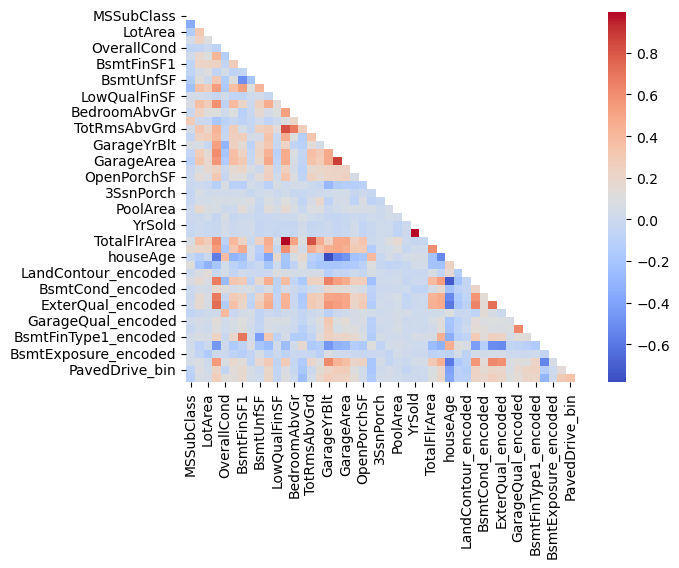

In [3531]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


corr = train_set.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,  fmt=".2f", cmap='coolwarm')
plt.show()
X = train_set.copy()


In [3532]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,60,RL,65.0,8450,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,Unf,0,150,856,GasA,Ex,SBrkr,0,1710,3,1,8,Typ,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2008,WD,Normal,1201824000,1710,3.5,5,3,-1.0,4,3,4,4,3,3,3,6,0,1.0,2003,1.0,1
1,20,RL,80.0,9600,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,Unf,0,284,1262,GasA,Ex,SBrkr,0,1262,3,1,6,Typ,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,2007,WD,Normal,1177977600,1262,2.5,31,3,-1.0,4,3,3,3,3,3,3,5,0,-1.0,1976,1.0,1
2,60,RL,68.0,11250,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,Unf,0,434,920,GasA,Ex,SBrkr,0,1786,3,1,6,Typ,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,2008,WD,Normal,1220227200,1786,3.5,7,2,-1.0,4,3,4,4,3,3,3,6,0,2.0,2002,1.0,1
3,70,RL,60.0,9550,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,Unf,0,540,756,GasA,Gd,SBrkr,0,1717,3,1,7,Typ,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2006,WD,Abnorml,1138752000,1717,2.0,91,2,-1.0,3,4,4,3,3,3,3,5,1,1.0,1970,1.0,1
4,60,RL,84.0,14260,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,Unf,0,490,1145,GasA,Ex,SBrkr,0,2198,4,1,9,Typ,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,2008,WD,Normal,1228089600,2198,3.5,8,2,-1.0,4,3,4,4,3,3,3,6,0,3.0,2000,1.0,1


In [3533]:
train_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1430.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,5.844521,1515.463699,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,1.207276e+09,1509.619178,2.210616,36.547945,2.591781,-0.777397,3.565068,3.010959,3.511644,3.39589,3.083562,2.976712,2.975342,3.571233,0.854795,1.197260,1984.865753,0.937063,0.934932
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,48.623081,525.480383,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,4.148662e+07,521.163523,0.785399,30.250152,0.582296,0.707666,0.678071,0.284178,0.663760,0.57428,0.351054,0.241665,0.232860,2.070649,0.959501,1.006214,20.645407,0.242935,0.246731
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,1.136074e+09,334.000000,1.000000,0.000000,0.000000,-1.000000,2.000000,1.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1950.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.175386e+09,1123.750000,2.000000,8.000000,2.000000,-1.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1967.000000,1.000000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.209600e+09,1458.000000,2.000000,35.000000,3.000000,-1.000000,4.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,0.000000,1.000000,1994.000000,1.000000,1.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.243814e+09,1775.250000,2.500000,54.000000,3.000000,-1.000000,4.000000,3.000000,4.000000,4.00000,3.000000,3.000000,3.000000,6.000000,2.000000,1.000000,2004.000000,1.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.00000

In [3534]:
train_set.dtypes

MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
Street                   object
Utilities                object
LotConfig                object
LandSlope                object
Neighborhood             object
Condition1               object
Condition2               object
BldgType                 object
HouseStyle               object
OverallQual               int64
OverallCond               int64
RoofStyle                object
RoofMatl                 object
Exterior1st              object
Exterior2nd              object
MasVnrType               object
MasVnrArea              float64
Foundation               object
BsmtFinSF1                int64
BsmtFinType2             object
BsmtFinSF2                int64
BsmtUnfSF                 int64
TotalBsmtSF               int64
Heating                  object
HeatingQC                object
Electrical               object
LowQualFinSF              int64
GrLivAre

In [3535]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,60,RL,65.0,8450,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,Unf,0,150,856,GasA,Ex,SBrkr,0,1710,3,1,8,Typ,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2008,WD,Normal,1201824000,1710,3.5,5,3,-1.0,4,3,4,4,3,3,3,6,0,1.0,2003,1.0,1
1,20,RL,80.0,9600,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,Unf,0,284,1262,GasA,Ex,SBrkr,0,1262,3,1,6,Typ,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,2007,WD,Normal,1177977600,1262,2.5,31,3,-1.0,4,3,3,3,3,3,3,5,0,-1.0,1976,1.0,1
2,60,RL,68.0,11250,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,Unf,0,434,920,GasA,Ex,SBrkr,0,1786,3,1,6,Typ,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,2008,WD,Normal,1220227200,1786,3.5,7,2,-1.0,4,3,4,4,3,3,3,6,0,2.0,2002,1.0,1
3,70,RL,60.0,9550,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,Unf,0,540,756,GasA,Gd,SBrkr,0,1717,3,1,7,Typ,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2006,WD,Abnorml,1138752000,1717,2.0,91,2,-1.0,3,4,4,3,3,3,3,5,1,1.0,1970,1.0,1
4,60,RL,84.0,14260,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,Unf,0,490,1145,GasA,Ex,SBrkr,0,2198,4,1,9,Typ,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,2008,WD,Normal,1228089600,2198,3.5,8,2,-1.0,4,3,4,4,3,3,3,6,0,3.0,2000,1.0,1


In [3536]:
train_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1430.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,5.844521,1515.463699,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,1.207276e+09,1509.619178,2.210616,36.547945,2.591781,-0.777397,3.565068,3.010959,3.511644,3.39589,3.083562,2.976712,2.975342,3.571233,0.854795,1.197260,1984.865753,0.937063,0.934932
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,48.623081,525.480383,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,4.148662e+07,521.163523,0.785399,30.250152,0.582296,0.707666,0.678071,0.284178,0.663760,0.57428,0.351054,0.241665,0.232860,2.070649,0.959501,1.006214,20.645407,0.242935,0.246731
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,1.136074e+09,334.000000,1.000000,0.000000,0.000000,-1.000000,2.000000,1.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1950.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.175386e+09,1123.750000,2.000000,8.000000,2.000000,-1.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1967.000000,1.000000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.209600e+09,1458.000000,2.000000,35.000000,3.000000,-1.000000,4.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,0.000000,1.000000,1994.000000,1.000000,1.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.243814e+09,1775.250000,2.500000,54.000000,3.000000,-1.000000,4.000000,3.000000,4.000000,4.00000,3.000000,3.000000,3.000000,6.000000,2.000000,1.000000,2004.000000,1.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.00000

In [3537]:
def handle_outliers(train_set, test_set, q1=0.025, q3=0.975):
    """
    Removes the outliers in train_set and applies the same transformations on test_set using
    the lower and upper bounds calculated based on the quantiles specified.

    Parameters:
    train_set (pandas.DataFrame): The training set to remove outliers from.
    test_set (pandas.DataFrame): The test set to apply the same transformations on.
    q1 (float): The lower quantile to calculate the bounds from. Default is 0.025.
    q3 (float): The upper quantile to calculate the bounds from. Default is 0.975.

    Returns:
    tuple: A tuple of transformed train and test sets.
    """
    # Copy the original sets to avoid modifying them directly
    X_train = train_set.copy()
    X_test = test_set.copy()
    def outlier_thresholds(dataframe, col_name, q1, q3):
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        IQR = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * IQR
        low_limit = quartile1 - 1.5 * IQR
        return low_limit, up_limit

    def check_outlier(dataframe, col_name):

        low_limit, up_limit = outlier_thresholds(dataframe, col_name , q1 , q3)
        return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None)

    def replace_with_thresholds(dataframe, variable, q1, q3):

        low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

    # Calculate the lower and upper limits based on the train set
    for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
        if check_outlier(X_train, col):
            replace_with_thresholds(X_train, col, q1=q1, q3=q3)
            
    # Transform the train set using the calculated bounds
    for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
        low_limit, up_limit = outlier_thresholds(X_train, col, q1=q1, q3=q3)
        X_train.loc[(X_train[col] > up_limit), col] = up_limit
        X_train.loc[(X_train[col] < low_limit), col] = low_limit

    # Transform the test set using the calculated bounds
    for col in X_test.select_dtypes(include=['int64', 'float64']).columns:
        low_limit, up_limit = outlier_thresholds(X_train, col, q1=q1, q3=q3)
        X_test.loc[(X_test[col] > up_limit), col] = up_limit
        X_test.loc[(X_test[col] < low_limit), col] = low_limit

    return X_train, X_test


In [3538]:
train_set , test_set = handle_outliers(train_set, test_set  )


In [3539]:
train_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1430.000000,1460.000000
mean,56.897260,69.979582,10192.843630,6.099315,5.575342,103.634406,442.185103,46.549315,567.240411,1056.517423,0.0,1515.417466,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,0.0,15.060959,0.0,23.334932,2007.815753,1.207276e+09,1509.535248,2.210616,36.547945,2.591781,-0.777397,3.565068,3.010959,3.511644,3.39589,3.083904,2.975685,2.974658,3.571233,0.854795,1.197260,1984.865753,0.937063,0.934932
std,42.300571,21.317861,5893.094176,1.382997,1.112799,180.157382,442.690891,161.319273,441.866955,429.481415,0.0,525.119919,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,0.0,55.757415,0.0,133.601823,1.328095,4.148662e+07,520.507029,0.785399,30.250152,0.582296,0.707666,0.678071,0.284178,0.663760,0.57428,0.349259,0.233997,0.227575,2.070649,0.959501,1.006214,20.645407,0.242935,0.246731
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,334.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2006.000000,1.136074e+09,334.000000,1.000000,0.000000,0.000000,-1.000000,2.000000,1.000000,2.000000,2.00000,1.500000,1.000000,1.000000,1.000000,0.000000,-1.000000,1950.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.0,1129.500000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2007.000000,1.175386e+09,1123.750000,2.000000,8.000000,2.000000,-1.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1967.000000,1.000000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.0,1464.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000,0.0,0.000000,2008.000000,1.209600e+09,1458.000000,2.000000,35.000000,3.000000,-1.000000,4.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,0.000000,1.000000,1994.000000,1.000000,1.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.0,1776.750000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.000000,2009.000000,1.243814e+09,1775.250000,2.500000,54.000000,3.000000,-1.000000,4.000000,3.000000,4.000000,4.00000,3.000000,3.000000,3.000000,6.000000,2.000000,1.000000,2004.000000,1.000000,1.000000
max,190.000000,261.625000,53298.587500,10.000000,9.000000,1525.750000,3520.250000,1474.000000,2336.000000,4778.437500,0.0,5574.500000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.00000

In [3540]:
train_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1430.000000,1460.000000
mean,56.897260,69.979582,10192.843630,6.099315,5.575342,103.634406,442.185103,46.549315,567.240411,1056.517423,0.0,1515.417466,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,0.0,15.060959,0.0,23.334932,2007.815753,1.207276e+09,1509.535248,2.210616,36.547945,2.591781,-0.777397,3.565068,3.010959,3.511644,3.39589,3.083904,2.975685,2.974658,3.571233,0.854795,1.197260,1984.865753,0.937063,0.934932
std,42.300571,21.317861,5893.094176,1.382997,1.112799,180.157382,442.690891,161.319273,441.866955,429.481415,0.0,525.119919,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,0.0,55.757415,0.0,133.601823,1.328095,4.148662e+07,520.507029,0.785399,30.250152,0.582296,0.707666,0.678071,0.284178,0.663760,0.57428,0.349259,0.233997,0.227575,2.070649,0.959501,1.006214,20.645407,0.242935,0.246731
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,334.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2006.000000,1.136074e+09,334.000000,1.000000,0.000000,0.000000,-1.000000,2.000000,1.000000,2.000000,2.00000,1.500000,1.000000,1.000000,1.000000,0.000000,-1.000000,1950.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.0,1129.500000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2007.000000,1.175386e+09,1123.750000,2.000000,8.000000,2.000000,-1.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1967.000000,1.000000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.0,1464.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000,0.0,0.000000,2008.000000,1.209600e+09,1458.000000,2.000000,35.000000,3.000000,-1.000000,4.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,0.000000,1.000000,1994.000000,1.000000,1.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.0,1776.750000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.000000,2009.000000,1.243814e+09,1775.250000,2.500000,54.000000,3.000000,-1.000000,4.000000,3.000000,4.000000,4.00000,3.000000,3.000000,3.000000,6.000000,2.000000,1.000000,2004.000000,1.000000,1.000000
max,190.000000,261.625000,53298.587500,10.000000,9.000000,1525.750000,3520.250000,1474.000000,2336.000000,4778.437500,0.0,5574.500000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.00000

One Hot encoding



In [3541]:
def onehot_encode(train, test):
    # combine train and test dataframes for consistency in one-hot encoding
    combined = pd.concat([train, test], ignore_index=True)
    obj_cols = train.select_dtypes(include = ['object']).columns
    
    # one-hot encode categorical columns
    for col in obj_cols:
        # get unique categories in both train and test sets
        categories = combined[col].unique()
        
        # create one-hot encoding column names
        encoding_cols = [f"{col}_{cat}" for cat in categories]
        
        # apply one-hot encoding to combined dataframe
        combined_encoding = pd.get_dummies(combined[col], columns=categories, prefix=col)
        
        # re-order encoding columns to ensure consistency between train and test dataframes
        combined_encoding = combined_encoding.reindex(columns=encoding_cols, fill_value=0)
        
        # add one-hot encoding columns to combined dataframe
        combined = pd.concat([combined, combined_encoding], axis=1)
        
        # drop original categorical column from combined dataframe
        combined = combined.drop(columns=[col] ,axis=1)
    
    # separate combined dataframe back into train and test sets
    train_encoding = combined.iloc[:train.shape[0], :]
    test_encoding = combined.iloc[train.shape[0]:, :]
    
    return train_encoding, test_encoding





In [3542]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,60,RL,65.0,8450.0,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706.0,Unf,0.0,150,856.0,GasA,Ex,SBrkr,0,1710.0,3.0,1.0,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,0.0,61,0.0,0,0,0,0,2008,WD,Normal,1201824000,1710.0,3.5,5,3,-1.0,4,3,4.0,4,3.0,3.0,3.0,6.0,0.0,1.0,2003,1.0,1.0
1,20,RL,80.0,9600.0,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978.0,Unf,0.0,284,1262.0,GasA,Ex,SBrkr,0,1262.0,3.0,1.0,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,298.0,0,0.0,0,0,0,0,2007,WD,Normal,1177977600,1262.0,2.5,31,3,-1.0,4,3,3.0,3,3.0,3.0,3.0,5.0,0.0,-1.0,1976,1.0,1.0
2,60,RL,68.0,11250.0,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486.0,Unf,0.0,434,920.0,GasA,Ex,SBrkr,0,1786.0,3.0,1.0,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,0.0,42,0.0,0,0,0,0,2008,WD,Normal,1220227200,1786.0,3.5,7,2,-1.0,4,3,4.0,4,3.0,3.0,3.0,6.0,0.0,2.0,2002,1.0,1.0
3,70,RL,60.0,9550.0,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216.0,Unf,0.0,540,756.0,GasA,Gd,SBrkr,0,1717.0,3.0,1.0,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,0.0,35,272.0,0,0,0,0,2006,WD,Abnorml,1138752000,1717.0,2.0,91,2,-1.0,3,4,4.0,3,3.0,3.0,3.0,5.0,1.0,1.0,1970,1.0,1.0
4,60,RL,84.0,14260.0,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655.0,Unf,0.0,490,1145.0,GasA,Ex,SBrkr,0,2198.0,4.0,1.0,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,192.0,84,0.0,0,0,0,0,2008,WD,Normal,1228089600,2198.0,3.5,8,2,-1.0,4,3,4.0,4,3.0,3.0,3.0,6.0,0.0,3.0,2000,1.0,1.0


In [3543]:

train_set , test_set = onehot_encode(train_set , test_set)


In [3544]:
train_set.shape , test_set.shape

((1460, 226), (1459, 226))

In [3545]:
cols_for_pca = train_set.select_dtypes(exclude = 'uint8').columns
cols_for_svd = train_set.select_dtypes(include = 'uint8').columns

In [3546]:
from sklearn.preprocessing import StandardScaler
impute_missing_values(test_set)
impute_missing_values(train_set)
def standard_scale(test_set, train_set , cols_to_scale):
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform the test_set
    train_set_scaled = train_set.copy()
    train_set_scaled[cols_to_scale] = scaler.fit_transform(train_set_scaled.loc[: , cols_to_scale])

    # Fit and transform the test_set
    test_set_scaled = test_set.copy()
    test_set_scaled[cols_to_scale] = scaler.transform(test_set_scaled.loc[: , cols_to_scale])

    return train_set_scaled , test_set_scaled

train_set_scaled , test_set_scaled =  standard_scale(test_set, train_set , cols_for_pca)


In [3547]:
train_set[cols_for_pca]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,60,65.0,8450.0,7.0,5,196.0,706.0,0.0,150.0,856.0,0,1710.0,3.0,1.0,8,0,2003.0,2.0,548.0,0.0,61,0.0,0,0,0,0,2008,1201824000,1710.0,3.5,5,3,-1.0,4,3,4.0,4,3.0,3.0,3.0,6.0,0.0,1.0,2003,1.0,1.0
1,20,80.0,9600.0,6.0,8,0.0,978.0,0.0,284.0,1262.0,0,1262.0,3.0,1.0,6,1,1976.0,2.0,460.0,298.0,0,0.0,0,0,0,0,2007,1177977600,1262.0,2.5,31,3,-1.0,4,3,3.0,3,3.0,3.0,3.0,5.0,0.0,-1.0,1976,1.0,1.0
2,60,68.0,11250.0,7.0,5,162.0,486.0,0.0,434.0,920.0,0,1786.0,3.0,1.0,6,1,2001.0,2.0,608.0,0.0,42,0.0,0,0,0,0,2008,1220227200,1786.0,3.5,7,2,-1.0,4,3,4.0,4,3.0,3.0,3.0,6.0,0.0,2.0,2002,1.0,1.0
3,70,60.0,9550.0,7.0,5,0.0,216.0,0.0,540.0,756.0,0,1717.0,3.0,1.0,7,1,1998.0,3.0,642.0,0.0,35,272.0,0,0,0,0,2006,1138752000,1717.0,2.0,91,2,-1.0,3,4,4.0,3,3.0,3.0,3.0,5.0,1.0,1.0,1970,1.0,1.0
4,60,84.0,14260.0,8.0,5,350.0,655.0,0.0,490.0,1145.0,0,2198.0,4.0,1.0,9,1,2000.0,3.0,836.0,192.0,84,0.0,0,0,0,0,2008,1228089600,2198.0,3.5,8,2,-1.0,4,3,4.0,4,3.0,3.0,3.0,6.0,0.0,3.0,2000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6.0,5,0.0,0.0,0.0,953.0,953.0,0,1647.0,3.0,1.0,7,1,1999.0,2.0,460.0,0.0,40,0.0,0,0,0,0,2007,1185926400,1647.0,2.5,8,3,-1.0,4,3,3.0,3,3.0,3.0,3.0,1.0,0.0,1.0,2000,1.0,1.0
1456,20,85.0,13175.0,6.0,6,119.0,790.0,163.0,589.0,1542.0,0,2073.0,3.0,1.0,7,2,1978.0,2.0,500.0,349.0,0,0.0,0,0,0,0,2010,1264982400,2073.0,3.0,32,3,-1.0,4,3,3.0,3,3.0,3.0,3.0,5.0,2.0,1.0,1988,1.0,1.0
1457,70,66.0,9042.0,7.0,9,0.0,275.0,0.0,877.0,1152.0,0,2340.0,4.0,1.0,9,2,1941.0,1.0,252.0,0.0,60,0.0,0,0,0,1125,2010,1272672000,2340.0,2.0,69,3,-1.0,3,4,4.0,5,4.0,3.0,3.0,6.0,0.0,1.0,2006,1.0,1.0
1458,20,68.0,9717.0,5.0,6,0.0,49.0,1029.0,0.0,1078.0,0,1078.0,2.0,1.0,5,0,1950.0,1.0,240.0,366.0,0,112.0,0,0,0,0,2010,1270080000,1078.0,2.0,60,3,-1.0,3,3,4.0,3,3.0,3.0,3.0,6.0,1.0,2.0,1996,1.0,1.0


In [3548]:
train_set_scaled[cols_for_pca]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,0.073375,-0.233667,-0.295845,0.651479,-0.517200,0.512870,0.596139,-0.288653,-0.944591,-0.467043,0.0,0.370676,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,0.0,-0.270208,0.0,-0.174720,0.138777,-0.131468,0.385266,1.642256,-1.043259,0.701291,-0.314667,0.641645,-0.038577,0.735994,1.052302,-0.240317,0.103948,0.111397,1.173351,-0.891179,-0.196109,0.878668,0.261865,0.263813
1,-0.872563,0.470209,-0.100634,-0.071836,2.179628,-0.575441,1.210774,-0.288653,-0.641228,0.478607,0.0,-0.482755,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,0.0,-0.270208,0.0,-0.174720,-0.614439,-0.706463,-0.475729,0.368581,-0.183465,0.701291,-0.314667,0.641645,-0.038577,-0.771091,-0.689604,-0.240317,0.103948,0.111397,0.690246,-0.891179,-2.184439,-0.429577,0.261865,0.263813
2,0.073375,-0.092892,0.179450,0.651479,-0.517200,0.324081,0.099008,-0.288653,-0.301643,-0.317975,0.0,0.515454,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,0.0,-0.270208,0.0,-0.174720,0.138777,0.312277,0.531327,1.642256,-0.977121,-1.016637,-0.314667,0.641645,-0.038577,0.735994,1.052302,-0.240317,0.103948,0.111397,1.173351,-0.891179,0.798056,0.830215,0.261865,0.263813
3,0.309859,-0.468293,-0.109122,0.651479,-0.517200,-0.575441,-0.511107,-0.288653,-0.061670,-0.699961,0.0,0.384011,0.163779,-0.211454,0.296763,0.600495,0.812705,1.650307,0.790804,-0.752176,-0.176048,4.092524,0.0,-0.270208,0.0,-0.174720,-1.367655,-1.652287,0.398719,-0.268257,1.800676,-1.016637,-0.314667,-0.833633,3.481550,0.735994,-0.689604,-0.240317,0.103948,0.111397,0.690246,0.151386,-0.196109,-0.720298,0.261865,0.263813
4,0.073375,0.657909,0.690393,1.374795,-0.517200,1.367971,0.480895,-0.288653,-0.174865,0.206092,0.0,1.300306,1.390023,-0.211454,1.527656,0.600495,0.896086,1.650307,1.698485,0.780197,0.563760,-0.359325,0.0,-0.270208,0.0,-0.174720,0.138777,0.501859,1.323134,1.642256,-0.944052,-1.016637,-0.314667,0.641645,-0.038577,0.735994,1.052302,-0.240317,0.103948,0.111397,1.173351,-0.891179,1.792220,0.733308,0.261865,0.263813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.374443,-0.386321,-0.071836,-0.517200,-0.575441,-0.999200,-0.288653,0.873321,-0.241111,0.0,0.250662,0.163779,-0.211454,0.296763,0.600495,0.854395,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,0.0,-0.270208,0.0,-0.174720,-0.614439,-0.514798,0.264188,0.368581,-0.944052,0.701291,-0.314667,0.641645,-0.038577,-0.771091,-0.689604,-0.240317,0.103948,0.111397,-1.242177,-0.891179,-0.196109,0.733308,0.261865,0.263813
1456,-0.872563,0.704835,0.506216,-0.071836,0.381743,0.085319,0.785953,0.722112,0.049262,1.130780,0.0,1.062183,0.163779,-0.211454,0.296763,2.152216,-0.021102,0.311725,0.126420,2.033231,-0.704483,-0.359325,0.0,-0.270208,0.0,-0.174720,1.645210,1.391433,1.082901,1.005418,-0.150396,0.701291,-0.314667,0.641645,-0.038577,-0.771091,-0.689604,-0.240317,0.103948,0.111397,0.690246,1.193952,-0.196109,0.151865,0.261865,0.263813
1457,0.309859,-0.186742,-0.195354,0.651479,3.078570,-0.575441,-0.377786,-0.288653,0.701265,0.222397,0.0,1.570813,1.390023,-0.211454,1.527656,2.152216,-1.563645,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,0.0,-0.270208,0.0,8.248709,1

In [3549]:
test_set_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,...,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Basment,GarageType_2Types,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
1460,-0.872563,0.470209,0.242597,-0.795151,0.381743,-0.575441,0.058334,0.604293,-0.672923,-0.406484,0.0,-1.179978,-1.062465,-0.211454,-0.934130,-0.951226,-0.729838,-1.026858,1.202536,0.365179,-0.704483,-0.359325,0.0,1.882709,0.0,-0.174720,1.64521,1.641431,-1.179130,-1.541932,0.411777,0.701291,-0.314667,-0.833633,-0.038577,-0.771091,-0.689604,-0.240317,0.103948,0.111397,-0.275966,1.193952,-0.196109,-1.156380,0.261865,0.263813,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,

In [3550]:
test_set_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,...,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Basment,GarageType_2Types,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.0,1459.0,1459.000000,1459.000000,1459.000000,1459.000000

In [3551]:
train_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,...,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Basment,GarageType_2Types,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,

In [3552]:
len(cols_for_pca) , len(cols_for_svd)

(46, 180)

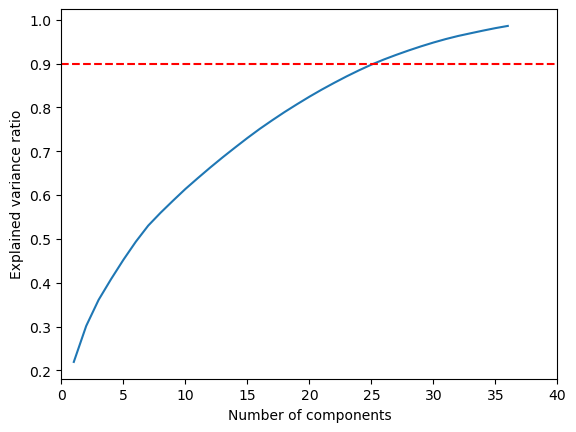

In [3553]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA with n_components=None to keep all components
pca = PCA(n_components=36)

# Fit PCA to X_train and transform X_train to obtain principal components
train_set_scaled_pca = pca.fit_transform(train_set_scaled[cols_for_pca])
test_set_scaled_pca = pca.transform(test_set_scaled[cols_for_pca])
cum_var = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),cum_var )
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlim(0, 40)
plt.show()

In [3554]:
train_set_scaled_pca.shape , test_set_scaled_pca.shape

((1460, 36), (1459, 36))

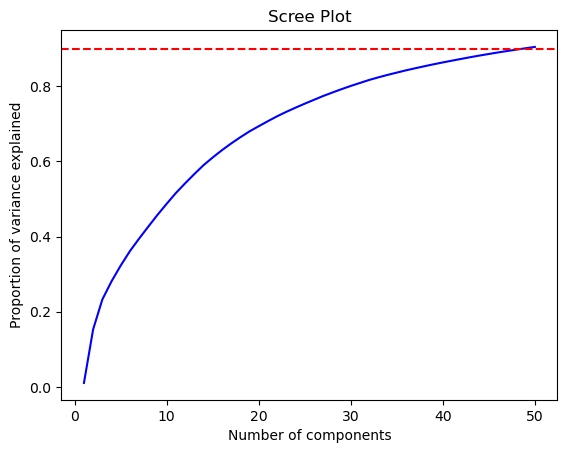

In [3555]:
from sklearn.decomposition import TruncatedSVD

# One-hot encode the categorical data
cols_for_svd

# Compute the TruncatedSVD

tsvd = TruncatedSVD(n_components=50)
tsvd.fit(train_set_scaled[cols_for_svd])

# Transform the data
train_set_scaled_svd= tsvd.transform(train_set_scaled[cols_for_svd])
test_set_scaled_svd = tsvd.transform(test_set_scaled[cols_for_svd])

# Compute the proportion of variance explained by each component
variance_prop_train = tsvd.explained_variance_ratio_
cum_var = np.cumsum(variance_prop_train)
# Plot the scree plot
plt.plot(range(1, tsvd.n_components + 1), cum_var,  color='blue')
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree Plot')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

# cumvar[-1] == 90.5% for 50 components

In [3556]:
train_set_scaled_svd.shape , test_set_scaled_svd.shape

((1460, 50), (1459, 50))

In [3557]:
train_dim_reduced = np.concatenate((train_set_scaled_pca , train_set_scaled_svd) ,axis =1)
test_dim_reduced = np.concatenate((test_set_scaled_pca , test_set_scaled_svd) ,axis =1)

In [3558]:
train_dim_reduced.shape, test_dim_reduced.shape

((1460, 86), (1459, 86))

In [3559]:
y.shape

(1460,)

In [3560]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# fit the model on training data
xgb_reg.fit(train_dim_reduced,y )
preds_sub = xgb_reg.predict(test_dim_reduced)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = preds_sub
sub.to_csv('submission-log.csv',index=False)

In [3561]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
0,60,RL,65.0,8450,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,Unf,0,150,856,GasA,Ex,SBrkr,0,1710,3,1,8,Typ,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2008,WD,Normal,1201824000,1710,3.5,5,3,-1.0,4,3,4,4,3,3,3,6,0,1.0,2003,1.0,1
1,20,RL,80.0,9600,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,Unf,0,284,1262,GasA,Ex,SBrkr,0,1262,3,1,6,Typ,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,2007,WD,Normal,1177977600,1262,2.5,31,3,-1.0,4,3,3,3,3,3,3,5,0,-1.0,1976,1.0,1
2,60,RL,68.0,11250,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,Unf,0,434,920,GasA,Ex,SBrkr,0,1786,3,1,6,Typ,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,2008,WD,Normal,1220227200,1786,3.5,7,2,-1.0,4,3,4,4,3,3,3,6,0,2.0,2002,1.0,1
3,70,RL,60.0,9550,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,Unf,0,540,756,GasA,Gd,SBrkr,0,1717,3,1,7,Typ,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2006,WD,Abnorml,1138752000,1717,2.0,91,2,-1.0,3,4,4,3,3,3,3,5,1,1.0,1970,1.0,1
4,60,RL,84.0,14260,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,Unf,0,490,1145,GasA,Ex,SBrkr,0,2198,4,1,9,Typ,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,2008,WD,Normal,1228089600,2198,3.5,8,2,-1.0,4,3,4,4,3,3,3,6,0,3.0,2000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,0,Unf,0,953,953,GasA,Ex,SBrkr,0,1647,3,1,7,Typ,1,Attchd,1999.0,RFn,2,460,0,40,0,0,0,0,0,2007,WD,Normal,1185926400,1647,2.5,8,3,-1.0,4,3,3,3,3,3,3,1,0,1.0,2000,1.0,1
1456,20,RL,85.0,13175,Pave,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,CBlock,790,Rec,163,589,1542,GasA,TA,SBrkr,0,2073,3,1,7,Min1,2,Attchd,1978.0,Unf,2,500,349,0,0,0,0,0,0,2010,WD,Normal,1264982400,2073,3.0,32,3,-1.0,4,3,3,3,3,3,3,5,2,1.0,1988,1.0,1
1457,70,RL,66.0,9042,Pave,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Stone,275,Unf,0,877,1152,GasA,Ex,SBrkr,0,2340,4,1,9,Typ,2,Attchd,1941.0,RFn,1,252,0,60,0,0,0,0,2500,2010,WD,Normal,1272672000,2340,2.0,69,3,-1.0,3,4,4,5,4,3,3,6,0,1.0,2006,1.0,1
1458,20,RL,68.0,9717,Pave,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,CBlock,49,Rec,1029,0,1078,GasA,Gd,FuseA,0,1078,2,1,5,Typ,0,Attchd,1950.0,Unf,1,240,366,0,112,0,0,0,0,2010,WD,Normal,1270080000,1078,2.0,60,3,-1.0,3,3,4,3,3,3,3,6,1,2.0,1996,1.0,1


In [3562]:
from sklearn.model_selection import train_test_split
impute_missing_values(X)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state = 42)


In [3563]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,unix_timestamp,TotalFlrArea,TotalBaths,houseAge,LotShape_encoded,LandContour_encoded,BsmtQual_encoded,BsmtCond_encoded,KitchenQual_encoded,ExterQual_encoded,ExterCond_encoded,GarageQual_encoded,GarageCond_encoded,BsmtFinType1_encoded,HeatingQC_encoded,BsmtExposure_encoded,BuiltOrRenovated,PavedDrive_bin,CentralAir_bin
254,20,RL,70.0,8400,Pave,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,922,Unf,0,392,1314,GasA,TA,SBrkr,0,1314,3,1,5,Typ,0,Attchd,1957.000000,RFn,1,294,250,0,0,0,0,0,0,2010,WD,Normal,1275350400,1314,2.0,53,3,-1.0,3,3,3,3,4,3,3,3,2,1.0,1957,1.000000,1
1066,60,RL,59.0,7837,Pave,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,0,Unf,0,799,799,GasA,Gd,SBrkr,0,1571,3,1,7,Typ,1,Attchd,1993.000000,RFn,2,380,0,40,0,0,0,0,0,2009,WD,Normal,1241136000,1571,2.5,16,2,-1.0,4,3,3,4,3,3,3,1,1,1.0,1994,1.000000,1
638,30,RL,67.0,8777,Pave,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,CBlock,0,Unf,0,796,796,GasA,Gd,FuseA,0,796,2,1,4,Typ,0,Attchd,1978.506164,Unf,0,0,328,0,164,0,0,0,0,2008,WD,Normal,1209600000,796,1.0,98,3,-1.0,2,3,3,3,3,3,3,1,1,1.0,1950,0.937063,1
799,50,RL,60.0,7200,Pave,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,BrkTil,569,Unf,0,162,731,GasA,Ex,SBrkr,0,1768,3,1,7,Typ,2,Detchd,1939.000000,Unf,1,240,0,0,264,0,0,0,0,2007,WD,Normal,1180656000,1768,2.5,70,3,-1.0,4,3,4,3,3,3,3,5,0,1.0,1950,1.000000,1
380,50,RL,50.0,5000,Pave,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,BrkTil,218,Unf,0,808,1026,GasA,TA,SBrkr,0,1691,3,1,6,Typ,1,Detchd,1924.000000,Unf,1,308,0,0,242,0,0,0,0,2010,WD,Normal,1272672000,1691,2.0,86,3,-1.0,3,3,4,3,3,3,3,2,2,1.0,1950,1.000000,1


In [3564]:

def transformerScalerPCA_SVD(X_train , X_test , n_compPCA , n_compSVD ):


    X_train , X_test = onehot_encode(X_train , X_test)

    cols_for_pca = X_train.select_dtypes(exclude = 'uint8').columns
    cols_for_svd = X_train.select_dtypes(include = 'uint8').columns
    
    X_train_scaled , X_test_scaled = standard_scale(X_train ,X_test ,  cols_for_pca)
    
    # Initialize PCA with n_components=None to keep all components
    pca = PCA(n_components=n_compPCA)

    # Fit PCA to X_train and transform X_train to obtain principal components
    train_set_scaled_pca = pca.fit_transform(X_train_scaled[cols_for_pca])
    test_set_scaled_pca = pca.transform(X_test_scaled[cols_for_pca])

    tsvd = TruncatedSVD(n_components=n_compSVD)
    tsvd.fit(X_train_scaled[cols_for_svd])
    train_set_scaled_svd = tsvd.transform(X_train_scaled[cols_for_svd])
    test_set_scaled_svd = tsvd.transform(X_test_scaled[cols_for_svd])
    train_dim_reduced = np.concatenate((train_set_scaled_pca , train_set_scaled_svd), axis=1 )
    test_dim_reduced = np.concatenate((test_set_scaled_pca , test_set_scaled_svd), axis=1 )
    
    return train_dim_reduced , test_dim_reduced


In [3565]:
X_test_trans, X_train_trans = transformerScalerPCA_SVD(X_train , X_test, 36 , 50)

In [3566]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

params= {
    'max_depth': [5,6,7],
    'learning_rate': [0.1 , 0.2, 0.3 ],
    'n_estimators': [100 , 110,120 , 130],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [0.5, 1,2],
    'subsample': [ 0.9, 1],
    'colsample_bytree': [0.9, 1, 1.1],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.1, 1,2]
}

# define GridSearchCV with 5-fold cross-validation and mean squared error as the scoring metric
grid_cv =RandomizedSearchCV(estimator=xgb_reg, param_distributions=params, scoring=make_scorer(mean_squared_error), cv=3 , n_iter = 10)

# fit the model on training data
grid_cv.fit(X_train_trans, y_train)

# predict on test data with best estimator
y_pred = grid_cv.best_estimator_.predict(X_test_trans)

# calculate RMSE with best estimator
rmse = (mean_squared_error(y_test, y_pred, squared=False))
print('Root Mean Squared Error:', rmse)

# print best parameters
print('Best parameters:', grid_cv.best_params_)

/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python

Root Mean Squared Error: 29171.544460388577
Best parameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0.2, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [3567]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MSE
lg = LinearRegression()
lg.fit(X_train_trans , y_train)
print(MSE(y_test, lg.predict(X_test_trans)))

20624.772726307405


In [3590]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter= 10000)
hyperparms  = {'alpha' : np.linspace(1,300,5)}
grid_search_lasso = GridSearchCV(lasso , hyperparms , cv = 3 , scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_trans , y_train)
print('best_params : {}'.format(grid_search_lasso.best_params_))
print("Best mean squared error:", np.sqrt(-grid_search_lasso.best_score_))

best_params : {'alpha': 225.25}
Best mean squared error: 37421.07456354744


In [3588]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas = [2, 100 , 200 ,300 ,320 ,400] , cv = 3)
ridgecv.fit(X_train_trans, y_train) 
# Print best alpha and corresponding mean squared error
print("Best alpha:", ridgecv.alpha_)

print("RMSE:", np.sqrt(mean_squared_error(y_test, ridgecv.predict(X_test_trans))))

Best alpha: 320
RMSE: 35128.39384669755


In [3570]:
np.sqrt(1233814379.7196949)

35125.69401050597

In [3571]:

# fit the model on training data
grid_search_lasso.best_estimator_.fit(train_dim_reduced,y )
preds_sub = grid_search_lasso.best_estimator_.predict(test_dim_reduced)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = preds_sub
sub.to_csv('submission-log.csv',index=False)

In [3572]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error as MSE

# cols_numeric = [x for x in test_set.columns if test_set[x].dtype in ['int', 'float']]
# impute_missing_values(X_train)
# impute_missing_values(X_test)
# lg = LinearRegression()
# lg.fit(X_train ,y_train )
# y_pred = lg.predict(X_test)
# rmse_lg = MSE(y_test , y_pred)**0.5


In [3573]:
# X_train.isnull().sum()
# y_train.mean() , rmse_lg

In [3574]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Initialize PCA with n_components=None to keep all components
# pca = PCA(n_components=25)

# # Fit PCA to X_train and transform X_train to obtain principal components
# X_train_pca_ = pca.fit_transform(X_train)
# X_test_pca_ = pca.transform(X_test)


In [3575]:
# lg = LinearRegression()
# lg.fit(X_train_pca_ , y_train)
# rmse_pca=  (MSE(y_test, lg.predict(X_test_pca_ )))**0.5
# print(rmse_pca)

In [3576]:
# import xgboost as xgb
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# results = []
# # Initialize PCA with n_components=None to keep all components
# for i in range(1, 15):
#     pca = PCA(n_components=i , random_state= 0)

#     # Fit PCA to X_train and transform X_train to obtain principal components
#     X_train_pca_ = pca.fit_transform(X_train)
#     X_test_pca_ = pca.transform(X_test)
#     xgb_reg = xgb.XGBRegressor(objective='reg:squarederror' ,random_state = 0)

#     # fit the model on training data
#     xgb_reg.fit(X_train_pca_, y_train)

#     # predict on test data
#     y_pred = xgb_reg.predict(X_test_pca_)

#     # calculate MSE
#     mse = (MSE(y_test, y_pred))**0.5
#     results.append(mse)
    


In [3577]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer, mean_squared_error
# pca = PCA(n_components=13 , random_state= 0)

#     # Fit PCA to X_train and transform X_train to obtain principal components
# X_train_pca_ = pca.fit_transform(X_train)
# X_test_pca_ = pca.transform(X_test)
# # define XGBoost regressor and parameter grid
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# params= {
#     # 'max_depth': [5,6,7],
#     # 'learning_rate': [ 0.2, 0.3 , 0.4],
#     # 'n_estimators': [110,120 , 130],
#     # 'gamma': [0, 0.1, 0.2],
#     # 'min_child_weight': [4, 5 ],
#     # 'subsample': [ 0.9, 1],
#     # 'colsample_bytree': [0.8],
#     # 'reg_alpha': [0, 0.1, 0.2],
#     # 'reg_lambda': [1, 1.5, 1,8]
# }

# # define GridSearchCV with 5-fold cross-validation and mean squared error as the scoring metric
# grid_cv =RandomizedSearchCV(estimator=xgb_reg, param_distributions=params, scoring=make_scorer(mean_squared_error), cv=5 , n_iter = 50)

# # fit the model on training data
# grid_cv.fit(X_train_pca_, y_train)

# # predict on test data with best estimator
# y_pred = grid_cv.best_estimator_.predict(X_test_pca_)

# # calculate RMSE with best estimator
# rmse = (mean_squared_error(y_test, y_pred, squared=False))
# print('Root Mean Squared Error:', rmse)

# # print best parameters
# print('Best parameters:', grid_cv.best_params_)


In [3578]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
def test_models(X_train, y_train, X_test, y_test):
    # Define list of regressors to test
    regressors = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        SVR(),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(random_state=42),
    ]

    # Create a list to store the results
    results = []

    # Iterate through regressors, fit and evaluate
    for regressor in regressors:
        # Fit regressor to training data
        regressor.fit(X_train_trans, y_train)

        # Predict on test data
        y_pred = regressor.predict(X_test_trans)

        # Calculate RMSE
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Add results to list
        results.append({'Model': regressor.__class__.__name__,
                        'Test_RMSE': test_rmse})

    # Create pandas DataFrame from results list and sort by ascending Test_RMSE
    results_df = pd.DataFrame(results).sort_values('Test_RMSE')

    return results_df
test_models(X_train_trans, y_train, X_test_trans, y_test)


,Model,Test_RMSE
6,GradientBoostingRegressor,29510.439582
5,RandomForestRegressor,33145.425087
1,Ridge,33968.292119
2,Lasso,34031.009513
0,LinearRegression,34039.588237
3,ElasticNet,36223.379422
4,SVR,88623.132130


In [3579]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
            # 'n_estimators': [100, 500, 700],
            #   'learning_rate': [0.01, 0.1, 0.5],
            #   'max_depth': [3, 5, 7],
            #   'min_samples_leaf': [ 5, 10]
            }

# Define the scoring metric to use for grid search CV
scoring = make_scorer(mean_squared_error, squared=False)

# Define the grid search object
grid_search = RandomizedSearchCV(gbr, param_distributions=param_grid, cv=3, n_jobs=-1, scoring=scoring , n_iter= 5)

# Fit the grid search object to the data
grid_search.fit(X_train_trans, y_train)
print(mean_squared_error(y_test , grid_search.best_estimator_.predict(X_test_trans))**0.5)

# Print the best hyperparameters and corresponding mean squared error
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"RMSE on validation set: {-grid_search.best_score_:.3f}")


/Users/panoskolyvakis/opt/miniconda3/envs/casestudyenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


29510.439581597817
Best hyperparameters: {}
RMSE on validation set: -30189.403


In [3584]:
# preds_sub = xgb_reg.predict(tsvd_scores_test_)
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = preds_sub
# sub.to_csv('submission-log.csv',index=False)

In [3585]:





# preds_sub = xgb_reg.predict(test_set_pca)
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = preds_sub
# sub.to_csv('submission-log.csv',index=False)